RMSE: 2.211


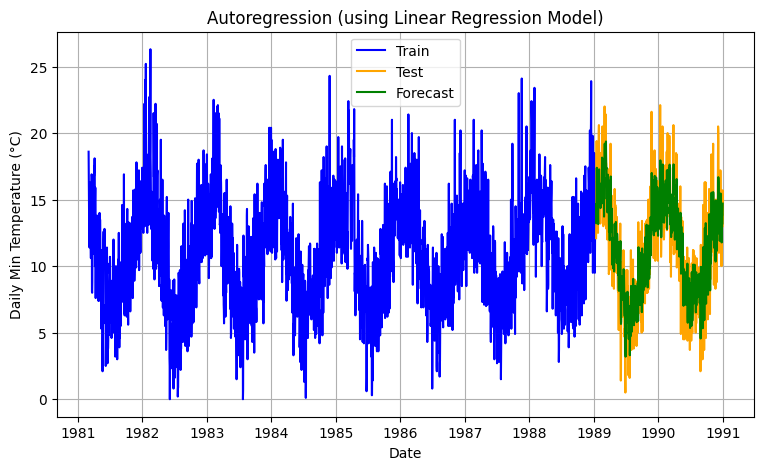

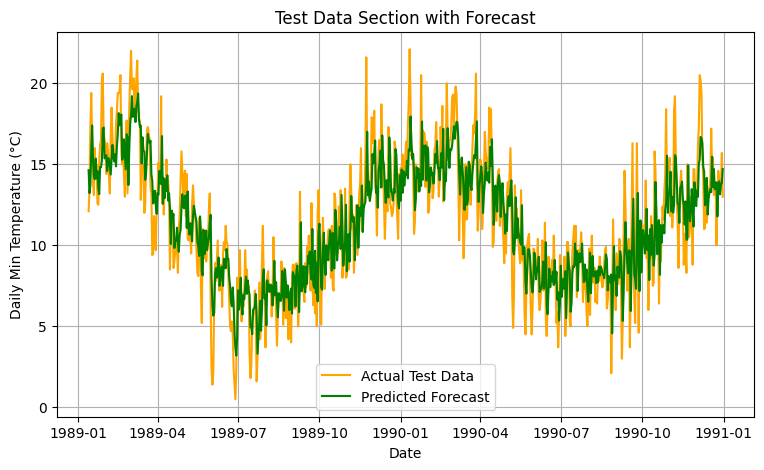

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

N=60 #Order of model
for lag in range(1, N+1):
    data[f'T-{lag}'] = data['Temp'].shift(lag)

data.dropna(inplace=True)

X = data.drop(columns=['Temp'])
y = data['Temp']

split = int(len(data) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

plt.figure(figsize=(9,5))
plt.title("Autoregression (using Linear Regression Model)")
plt.plot(y_train.index, y_train, label="Train", color='blue')
plt.plot(y_test.index, y_test, label="Test", color='orange')
plt.plot(y_test.index, y_pred, label="Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Daily Min Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9,5))
plt.title("Test Data Section with Forecast")
plt.plot(y_test.index, y_test, label="Actual Test Data", color='orange')
plt.plot(y_test.index, y_pred, label="Predicted Forecast", color='green')
plt.xlabel("Date")
plt.ylabel("Daily Min Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
